### Use Panda to concat, delete, insert, loc the data and I/O .csv files

In [1]:
import pandas  as pd

#### 1. from tops_total.csv to operate some modifies

In [17]:
#if we want to modify the row contain some errors with different names
i = tops_df[(tops_df.product_type == "cloak")].index
tops_df = tops_df.drop(i)
print(i)

Int64Index([], dtype='int64')


In [18]:
j = tops_df[((tops_df.product_type == "dress") | (tops_df.product_type == "dresses") | (tops_df.product_type == "dresses - formal"))].index
print(j)
tops_df = tops_df.drop(j)

Int64Index([], dtype='int64')


In [19]:
'''
Other operation for dataframes. 
since I put some files to different location, so the codes below just used once for creating tops_total.csv
#from all tops data we have to build the total dataset
tops_df_1 = pd.read_csv('train_data/tops.csv', usecols=["title", "tags", "product_type", "body_html"])  
tops_df_2 = pd.read_csv('sample.csv', usecols=["title", "tags", "product_type", "body_html"])
tops_df = pd.concat([tops_df_1, tops_df_2], ignore_index=True)
tops_df.to_csv('train_data/tops_total.csv')
'''

'\nOther operation for dataframes. \nsince I put some files to different location, so the codes below just used once for creating tops_total.csv\n#from all tops data we have to build the total dataset\ntops_df_1 = pd.read_csv(\'train_data/tops.csv\', usecols=["title", "tags", "product_type", "body_html"])  \ntops_df_2 = pd.read_csv(\'sample.csv\', usecols=["title", "tags", "product_type", "body_html"])\ntops_df = pd.concat([tops_df_1, tops_df_2], ignore_index=True)\ntops_df.to_csv(\'train_data/tops_total.csv\')\n'

In [24]:
k = tops_df[((tops_df.product_type == "short") | (tops_df.product_type == "shorts"))].index
print(k)
tops_df  = tops_df.drop(k)


Int64Index([], dtype='int64')


In [29]:
l = tops_df[(tops_df.product_type == "sweetlegs maternity")].index
print(l)
tops_df = tops_df.drop(l)

Int64Index([213], dtype='int64')


In [25]:
#clean all unnessary rows and columns, we output the modified tops.csv
tops_df = tops_df.loc[:, ["title",  "product_type", "tags", "body_html"]].copy()

In [26]:
tops_df.to_csv('tops.csv', index=False)

#### Create raw Train_data (.csv) and Test_data (.csv) from our total dataset (e.g 223 examples)

In [27]:
#build 180 train_data and 44 test_data 80% train 20% test for tops 223 samples
tops_df_train = tops_df.loc[0:180, ["title",  "product_type", "tags", "body_html"]].copy()
tops_df_test = tops_df.loc[180:,  ["title",  "product_type", "tags", "body_html"]].copy()
tops_df_train.to_csv('train_data/tops_train.csv', index= False)
tops_df_test.to_csv('test_data/tops_test.csv',index=False)

#### Build Customized DataSet From product.csv

In [17]:

from text_cleaner import cleanHtml
from text_cleaner import clean_product_description

columnChosen = ['id', 'title', 'product_type','tags', 'body_html']
products = pd.read_csv("/Users/luis/Downloads/products.csv", usecols=columnChosen)
products.head(10)

Aria High Waist; d cup+ meta size chart artesands size guide moderate coverage one piece plus size swim wear. The Hues Underwire One Piece has a beautifully sculpted feminine wrap-around style. The Hue has a hidden shelf bra with internal support underwire to fit a D cup to DD cup. This swimsuit style allows all of the fit and support required for body sculpting and figure forming confidence for the curvy body. Model is wearing an Australian size 18+ FEATURES:Supportive Underwire  Removable and Adjustable Straps  Front Ruching D/DD Cup Underwire Support  Nylon / Elastane Blend. Artesands Fits Your Curves. Designed in Australia. Care NotesWe recommend hand washing in cold water. Dry flat in a shady spot out of direct sunlight. Do not wring out or hang dry. Chlorinated water is not great and can cause colours to fade. Please make sure you always wash your swimsuit well after swimming in chlorinated water. We recommend swimsuit cleaner to keep your swimsuit looking amazing.


,id,title,tags,body_html,product_type
0,7609644417242,Aria High Waist,{},NaN,NaN
1,6750552359068,Hues Underwire One Piece,"{d-cup+,meta-size-chart-artesands-size-guide,m...","<meta charset=""utf-8"">\n<p><meta charset=""utf-...",one piece
2,7552737738970,Marble Maya One Piece,"{meta-size-chart-bound-size-guide,moderate-cov...","<meta charset=""utf-8"">\n<p data-mce-fragment=""...",NaN
3,7552752550106,Marble Malibu Set,"{crop,meta-size-chart-bound-size-guide,moderat...","<p data-mce-fragment=""1""><span>A Bond-Eye orig...",bikini top
4,5918371152028,Sophia Bottom,"{color-patterned,high-waist,meta-size-chart-po...","<meta charset=""utf-8"">\n<p>Meet your newest gi...",bikini bottom
5,612668932154,"Lion 22"" Bronze",{},NaN,default
6,5918535942300,Sonja Top,"{color-stripes,crop,meta-size-chart-power-2-th...","<meta charset=""utf-8"">\n<p>This retro revival ...",bikini top
7,6613956362396,Shirley Tie-Side,"{high-waist,meta-size-chart-power-2-the-flower...","<meta charset=""utf-8"">\n<p><meta charset=""utf-...",bikini bottom
8,5918251450524,Gwen Ruffle Bottom,"{color-patterned,high-leg,meta-size-chart-powe...","<p class=""p1"" data-mce-fragment=""1"">Gwen Ruffl...",bikini bottom
9,5815675879580,Billie Bottom,"{color-patterned,meta-size-chart-power-2-the-f...","<meta charset=""utf-8"">\n<p data-mce-fragment=""...",bikini bottom


In [20]:
k = products[((products.product_type.isnull()) | (products.product_type == 'default') 
            | (products.body_html.isnull()) | (products.tags == '{}') 
            | (products.product_type == 'none'))].index
products = products.drop(k).reset_index()


##### Drop any null and default rows in product_type and drop empty 'tags' rows

In [21]:

#pre-clean products cloumns and build our own data set columns and input-data format for NLP.
len(products.index)
r, c = products.shape[0], products.shape[1]
print(r, c)

17973 6


In [ ]:
#insert new column with names

In [22]:
products.insert(len(products.columns), '1st_class_label', 0, allow_duplicates=True)
products.insert(len(products.columns), '2nd_class_label', 0, allow_duplicates=True)
products.insert(len(products.columns), '3rd_class_label', 0, allow_duplicates=True )
products.insert(len(products.columns), 'raw_text', "", allow_duplicates=True)


In [23]:
#cleaning the html format to string types.
from text_cleaner import raw_content
for i in range(products.shape[0]):
    
    products.loc[i, 'raw_text'] = raw_content(products.loc[i, 'title'], products.loc[i, 'tags'], products.loc[i, 'body_html'])

In [8]:
products = pd.read_csv('temp_not_finished.csv')
k = products[((products.product_type.isnull()) | (products.product_type == 'default') 
            | (products.body_html.isnull()) | (products.tags == '{}') 
            | (products.product_type == 'none'))].index
products = products.drop(k).reset_index()

In [28]:
products.shape

(17973, 10)

In [24]:
products.to_csv('temp_not_finished.csv', index=True)

##### next step: 1_st_class_label, semi_automated labels.

In [25]:

products = pd.read_csv("temp_not_finished.csv")
k = products[((products.product_type.isnull()) | (products.product_type == 'default') 
            | (products.body_html.isnull()) | (products.tags == '{}') 
            | (products.product_type == 'none'))].index
k

Int64Index([], dtype='int64')

In [26]:

set = {"bikini top"}
for i in range(products.shape[0]):
    set.add(products.loc[i, 'product_type'])
len(set)

750

In [78]:

from nltk.corpus import wordnet31 as wn

1. Path_similarity Return a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1. By default, there is now a fake root node added to verbs so for cases where previously a path could not be found—and None was returned—it should return a value. The old behavior can be achieved by setting simulate_root to be False. A score of 1 represents identity i.e. comparing a sense with itself will return 1.

In [79]:
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
dog.path_similarity(cat)

0.2

In [80]:
jean = wn.synset('jeans.n.01')
pants = wn.synset('pants.n.01')
jean.path_similarity(pants)
wn.path_similarity(jean, pants)

0.16666666666666666

2.Leacock-Chodorow Similarity: Return a score denoting how similar two word senses are, based on the shortest path that connects the senses (as above) and the maximum depth of the taxonomy in which the senses occur. 

In [81]:
#Leacock-Chodorow Similarity, two word senses are
wn.lch_similarity(jean, pants)

1.845826690498331

In [82]:
hoodie = wn.synset('hoodie.n.01')
fleece = wn.synset('fleece.n.01')
wn.lch_similarity(hoodie, fleece)

WordNetError: no lemma 'hoodie' with part of speech 'n'

3. Wu-Palmer Similarity: Return a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node). 

In [83]:
wn.wup_similarity(pants, jean)

0.782608695652174

In [84]:
wn.wup_similarity(dog, cat)

0.8571428571428571

4. Resnik Similarity: Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node). Note that for any similarity measure that uses information content, the result is dependent on the corpus used to generate the information content and the specifics of how the information content was created.

In [85]:
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat') 
semcor_ic = wordnet_ic.ic('ic-semcor.dat')
from nltk.corpus import genesis
genesis_ic = wn.ic(genesis, False, 0.0)

In [86]:
wn.res_similarity(dog, cat, semcor_ic)

1e+300

In [87]:

dog.res_similarity(cat, genesis_ic)

7.197538297317934

In [88]:
jean.res_similarity(pants, genesis_ic)

7.675174315069589

In [89]:
wn.res_similarity(jean,pants, genesis_ic)

7.675174315069589

5. Jiang-Conrath Similarity Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node) and that of the two input Synsets. The relationship is given by the equation 1 / (IC(s1) + IC(s2) - 2 * IC(lcs)).

In [94]:
pants.jcn_similarity(jean, genesis_ic)

1e-300

6. Lin Similarity: Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node) and that of the two input Synsets. The relationship is given by the equation 2 * IC(lcs) / (IC(s1) + IC(s2)).

In [91]:
wn.lin_similarity(jean, pants, semcor_ic)

1.0

In [92]:
cat.lin_similarity(dog, semcor_ic)

1.0

In [8]:
import difflib # not good at semantic similarity
sm = difflib.SequenceMatcher(None)
sm.set_seq1("hat")
sm.set_seq2("headwear")
sm.ratio()

0.36363636363636365

In [11]:
import json
f = open('./json_files/label3_to_label2.json')
l3_l2 = json.load(f)
our_compared_list_l2 = set()
our_compared_list_l3 = set()
for k, v in l3_l2.items():
    our_compared_list_l2.add(v)
    our_compared_list_l3.add(k)
our_compared_list_l2 = list(our_compared_list_l2)
our_compared_list_l3 = list(our_compared_list_l3)


In [34]:
for item in our_compared_list_l3:
    print(nlp(item))


jumpsuit
bodycon dress
handheld bag
hair primer
camis
rectangular glasses
short dress
skateboard helmet
nutrition
training
sweatshirt
coats jackets
office shirt
book
eyebrow
hat
lip balm
lip balm treatment
tote bag
denim jackets
technical sport jackets
dry shampoo
phone case
poncho
ring
eyeliner
golf
drop tee
button-up shirt
short sleeve
leather jackets
set spray
knitwear
jelly
stilettos
dad jean
artwork
beauty tool
scarf
slipper
cargos pant
glove
heel boot
lip
pajama set
eye cream
moisturizer
drinkware
denim skirt
swim top
bra
dress
v neck
sweetleg
parkas
body wash
blue light block glasses
air freshener
flat iron
platform heel
suit
lingerie
the hipster
hair mask
culotte jean
graphic tee
flip flop
tee
conditioner
nail
espadrille
cardigan
leave-in conditioner
bralette
clog
area rug
skateboard deck
shower curtain
cocktail dress
highlighter
blanket
mock neck
board short
run
nightgown
t-shirt
turtle neck
earrings
long sleeve
platform boot
rain boot
card
chelsea boot
straightener
perfume
ba

In [37]:
#Using spacy to find cloest similarity categories(Brute Force)
import spacy
import pandas as pd
products = pd.read_csv("../data/product_types.csv")
products.insert(2, 'Spacy_similarity_layer2', '', allow_duplicates=True)
products.insert(3, 'Spacy_similarity_layer3', '', allow_duplicates=True)
products.insert(4, 'nltk_tfidf_cos_similarity_layer2', '', allow_duplicates=True)
products.insert(4, 'nltk_tfidf_cos_similarity_layer3', '', allow_duplicates=True)
nlp = spacy.load('en_core_web_lg')

for i in range(0,products.shape[0]):
    pt = products.loc[i]['product_type']
    #calulate pt with all product similarity
    distance = {}#our_label: distance_with_pt
    for l3 in our_compared_list_l3:
        doc1 = nlp(pt)
        doc2 = nlp(l3)
        sim = doc1.similarity(doc2)
        distance[l3] = sim
    sorted_distance = list(dict(sorted(distance.items(), key=lambda item: item[1], reverse=True)))
    first = sorted_distance[0]
    products.loc[i, 'Spacy_similarity_layer3'] = first
    distance_2 = {}#our_label: distance_with_pt
    for l2 in our_compared_list_l2:
        doc1 = nlp(pt)
        doc2 = nlp(l2)
        sim = doc1.similarity(doc2)
        distance_2[l2] = sim
    sorted_distance_2 = list(dict(sorted(distance_2.items(), key=lambda item: item[1], reverse=True)))
    first = sorted_distance_2[0]
    products.loc[i, 'Spacy_similarity_layer2'] = first



    #sort by value of dictionary put the first one to the spacy_similarity



/var/folders/r2/xt2ymfnd7nz2khk687zqlrpr0000gn/T/ipykernel_69756/2180732399.py:18: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim = doc1.similarity(doc2)
/var/folders/r2/xt2ymfnd7nz2khk687zqlrpr0000gn/T/ipykernel_69756/2180732399.py:27: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim = doc1.similarity(doc2)


In [ ]:
products.to_csv("temp.csv")

In [ ]:
import gensim
from nltk.tokenize import word_tokenize, sent_tokenize

#Tokenize words and create dictionary
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in our_compared_list_l2]
dictionary = gensim.corpora.Dictionary(gen_docs)

#print(dictionary.token2id)

#create a bad of words (Corpus)
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
print(corpus)


{'cosmetics': 0, 'scarf': 1, 'blazer/suit': 2, 'ties': 3, 'boot': 4, 'clip': 5, 'sweaters': 6, 'watch': 7, 'underwear': 8, 'sneakers': 9, 'glove': 10, 'homeware': 11, 'headwear': 12, 'care': 13, 'nail': 14, 'sleeve': 15, 'lace': 16, 'shoe': 17, 'bag': 18, 'scrunchie': 19, 'tank': 20, 'tops': 21, 'belt': 22, 'perfume': 23, 'skateboard': 24, 'leggings': 25, 'shirts': 26, 'tight': 27, 'wallet': 28, 'glasses': 29, 'heel/wedge': 30, 'pocket': 31, 'square': 32, 'short': 33, 'dresses': 34, 'skirts': 35, 'jumpsuits': 36, 'jewelry': 37, 'activewear': 38, 'pants/trousers': 39, 'coats/jackets': 40, 'bandana': 41, 'bath': 42, 'robe': 43, 'sock': 44, 'others': 45, 'sandal': 46, 'lingerie': 47, 'leather': 48, 'suede': 49, 'hair': 50, 'sleepwear': 51, 'beauty': 52, 'tools': 53, 'skin': 54, 'sticker': 55, 'slipper': 56, 'cloak': 57, 'swimwear': 58}


In [3]:
df = pd.read_csv('./products-June-28th.csv')
df = df.sample(n = 10)
df.to_csv('test.csv', index=False)

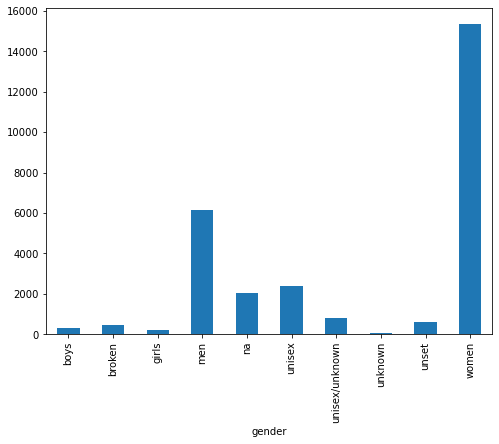

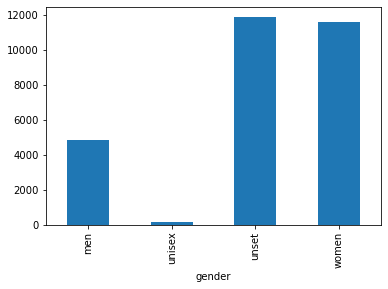

In [54]:
df_right = pd.read_csv('./(V1.8)all_products_data_set.csv')
df_wrong = pd.read_csv('./(V2.0)all_products_data_set.csv')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_right.groupby('gender').gender.count().plot.bar(ylim=0)
plt.show()
df_wrong.groupby('gender').gender.count().plot.bar(ylim=0)
plt.show()

In [13]:
df_right.columns

Index(['index', 'id', 'title', 'tags', 'images', 'gender', 'product_type',
       'product_type(modified)', 'main_category', 'sub_category',
       'match_most_similar_>80%_string', 'match_most_similar_>60%_string',
       'label_1st', 'label_2nd', 'label_3rd', 'buckets_num', 'buckets',
       'pattern_info', 'color_num', 'color_info', 'colors', 'url', 'raw_text'],
      dtype='object')

In [28]:
df_right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28426 entries, 0 to 28425
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           28426 non-null  int64 
 1   id                              28426 non-null  int64 
 2   title                           28426 non-null  object
 3   tags                            28426 non-null  object
 4   images                          28426 non-null  object
 5   gender                          28426 non-null  object
 6   product_type                    28426 non-null  object
 7   product_type(modified)          28325 non-null  object
 8   main_category                   8356 non-null   object
 9   sub_category                    23526 non-null  object
 10  match_most_similar_>80%_string  16192 non-null  object
 11  match_most_similar_>60%_string  15345 non-null  object
 12  label_1st                       28426 non-null

In [57]:
df_to_save = df_right[['index', 'id', 'title','gender']].copy()
#df_to_save.to_csv("maually_labelled_gender.csv", index=False)

In [58]:
for row in range(df_wrong.shape[0]):
    id = 0
    try:
        id = df_wrong.loc[row, 'id']
        df_wrong.loc[row, 'gender'] = df_right.loc[df_right.id == id, 'gender'].values[0]
    except:
        print(id)

In [51]:
#df_right.query('id == 7660981813466')
#df_right.loc[  'gender']
type(df_right.loc[df_right.id == 6762855530578, 'gender'].values[0])

str

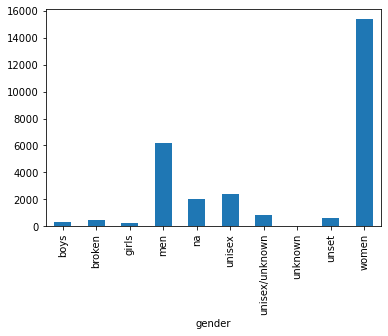

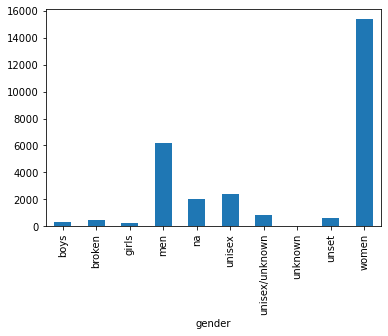

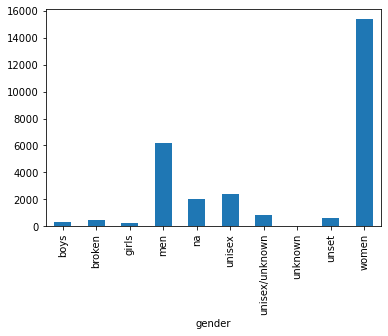

In [64]:
df = pd.read_csv('./(V2.0)all_products_data_set.csv')
df_gender_labelled = pd.read_csv('./manually_labelled_gender.csv')
#before modification diagram
df.groupby('gender').gender.count().plot.bar(ylim=0)
plt.show()
df_gender_labelled.groupby('gender').gender.count().plot.bar(ylim=0)
plt.show()
def correct_gender(df_gender_labelled:pd.DataFrame, original_df:pd.DataFrame):
    """
    Correct current dataset gender column by our mannually labelled dataset manually_labelled_gender.csv
    Args:
        df_gender_labelled (pd.DataFrame): manuaully_labelled_data
        original_df (pd.DataFrame): destination file to be modified
    """
    for row in range(original_df.shape[0]):
        id = 0
        try:
            id = original_df.loc[row, 'id']
            original_df.loc[row, 'gender'] = df_gender_labelled.loc[df_gender_labelled.id == id, 'gender'].values[0]
        except:
            print("ERROR: ", id)
    
    original_df.to_csv('./(V2.0)all_products_data_set.csv', index = False)
correct_gender(df_gender_labelled=df_gender_labelled, original_df=df)
#after modification diagram
df.groupby('gender').gender.count().plot.bar(ylim=0)
plt.show()

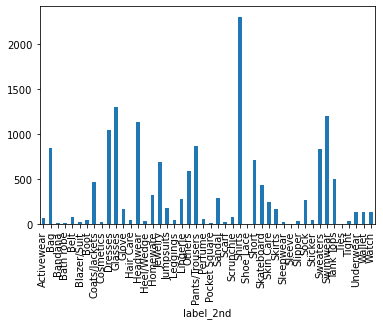

label_2nd
Activewear          71
Bag                844
Bandana              6
Bath robe           15
Belt                81
Blazer/Suit         21
Boot                45
Coats/Jackets      464
Cosmetics           24
Dresses           1046
Glasses           1299
Glove              162
Hair Care           44
Headwear          1128
Heel/Wedge          32
Homeware           320
Jewelry            686
Jumpsuits          179
Leggings            48
Lingerie           280
Others             592
Pants/Trousers     869
Perfume             58
Pocket Square        6
Sandal             293
Scarf               25
Scrunchie           75
Shirts            2302
Shoe Lace            3
Short              706
Skateboard         434
Skin Care          243
Skirts             164
Sleepwear           18
Sleeve               3
Slipper             29
Sock               267
Sticker             44
Sweaters           829
Swimwear          1195
Tank Tops          501
Ties                 3
Tight               36
U

In [75]:
df.groupby('label_2nd').label_2nd.count().plot.bar(ylim=0)
plt.show()
df.groupby('label_2nd').label_2nd.count()

In [100]:
print(df.groupby('label_2nd')['label_2nd'].count().agg({}).sort_values(ascending=False))

label_2nd
Shirts            2302
Glasses           1299
Swimwear          1195
Headwear          1128
Dresses           1046
Pants/Trousers     869
Bag                844
Sweaters           829
Short              706
Jewelry            686
Others             592
Tank Tops          501
Coats/Jackets      464
Skateboard         434
Homeware           320
Sandal             293
Lingerie           280
Sock               267
Skin Care          243
Jumpsuits          179
Skirts             164
Glove              162
Wallet             136
Watch              135
Underwear          131
Belt                81
Scrunchie           75
Activewear          71
Perfume             58
Leggings            48
Boot                45
Sticker             44
Hair Care           44
Tight               36
Heel/Wedge          32
Slipper             29
Scarf               25
Cosmetics           24
Blazer/Suit         21
Sleepwear           18
Bath robe           15
Bandana              6
Pocket Square        6
T

In [89]:
from datetime import datetime
print(datetime.now().strftime('%m_%d_%Y'))

12_09_2022


In [1]:
import pandas as pd 
df = pd.read_csv('./(V2.0)all_products_data_set.csv')


In [2]:
df.loc[21816]['raw_text']


'Made with kids in mind the Arcade Midnighter Youth belt is built for adventure loving kids. A fully adjustable and minimal buckle is perfect for growing kids and narrower belt loops. Made from an elastic stretch webbing ensures all-day comfort and keeps your kids pants where they should be. Built from machine washable and quick drying materials means this belt is durable and ready for anything your kid can throw at it. Kid-friendly Machine washable Travel-Friendly Belt width – 1.25′′ (3.17cm)'